In [1]:
import numpy as np
import matplotlib.image as mping
import matplotlib.pyplot as plt
import pywt
import pywt.data
from osgeo import gdal


# Load image
path =  r'D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_rgb.tif'
dataset = gdal.Open(path) 
b1 = dataset.GetRasterBand(1).ReadAsArray()
b2 = dataset.GetRasterBand(2).ReadAsArray()
b3 = dataset.GetRasterBand(3).ReadAsArray()
original = np.dstack((b1, b2, b3))
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
print('-------- Wavelet transformation of image ---------')
coeffs2 = pywt.dwt2(original, 'bior1.3')
print(len(coeffs2))
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'osgeo'

-------- Wavelet transformation of image ---------
[array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=flo

TypeError: Invalid shape (1, 6442, 7126, 3) for image data

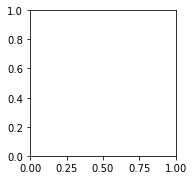

In [79]:
print('-------- Wavelet transformation of image ---------')
C = pywt.wavedec2(original, 'bior1.3', mode ='periodization')
coeffs = pywt.wavedec2(C, 'bior1.3', mode ='periodization')
imgr = np.uint8(coeffs)
cA2 = C[0]
LL= coeffs[-1]
print(coeffs)
fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [2]:
import cv2
import numpy as np

hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

original = cv2.GaussianBlur(hsv,(3,3),0)
     
# Calculation of Sobelx
sobelx = cv2.Sobel(original,cv2.CV_64F,1,0,ksize=5)
 
# Calculation of Sobely
sobely = cv2.Sobel(original,cv2.CV_64F,0,1,ksize=5)
 
# Calculation of Laplacian
laplacian = cv2.Laplacian(original,cv2.CV_64F).astype(np.uint8)
 
#cv2.imshow('sobelx',sobelx)
#cv2.imshow('sobely',sobely)
#cv2.imshow('laplacian',laplacian)




ModuleNotFoundError: No module named 'cv2'

In [2]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1.imshow(sobelx)

ax2 = fig.add_subplot(222)
ax2.imshow(sobely)

ax3 = fig.add_subplot(223)
ax3.imshow(laplacian)

plt.show()

NameError: name 'plt' is not defined

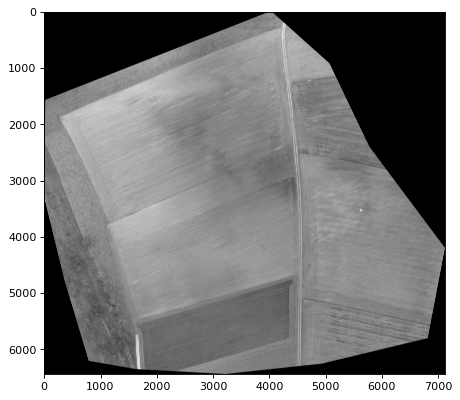

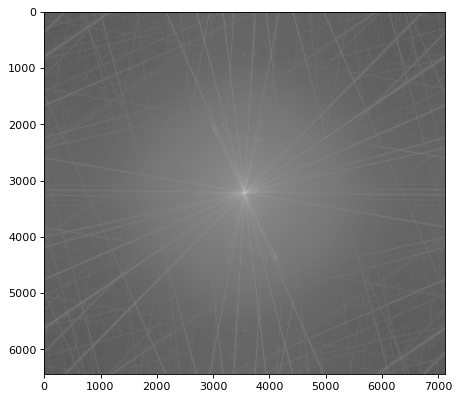

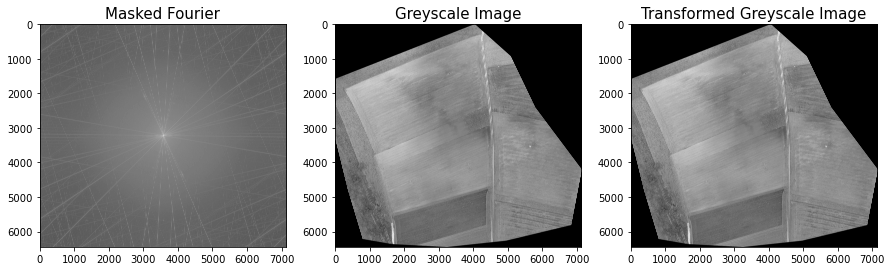

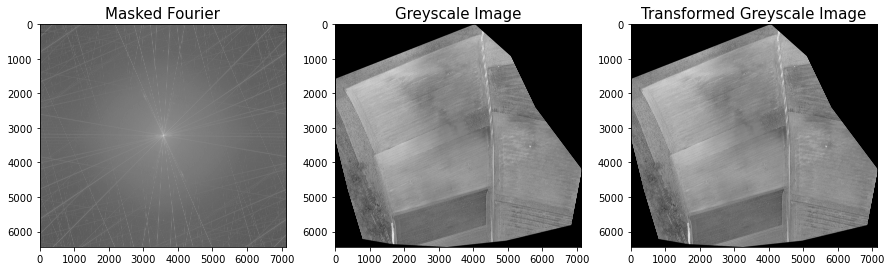

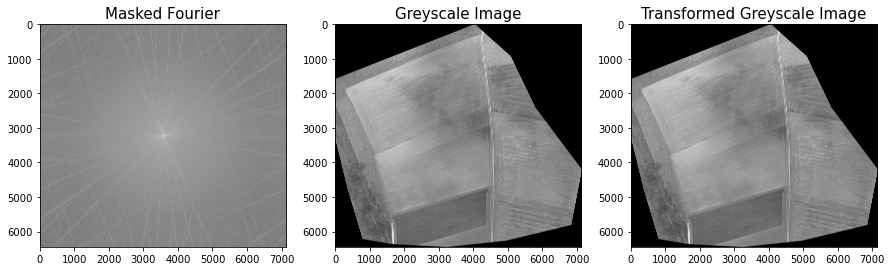

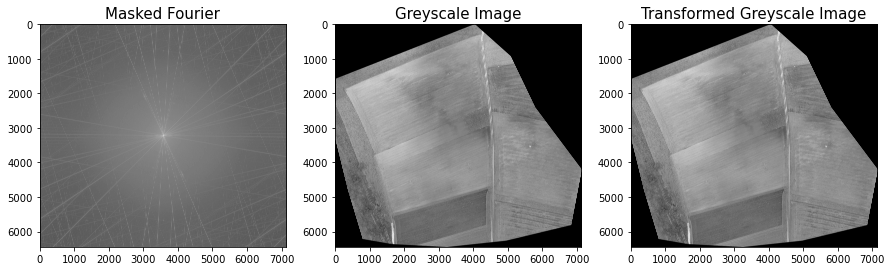

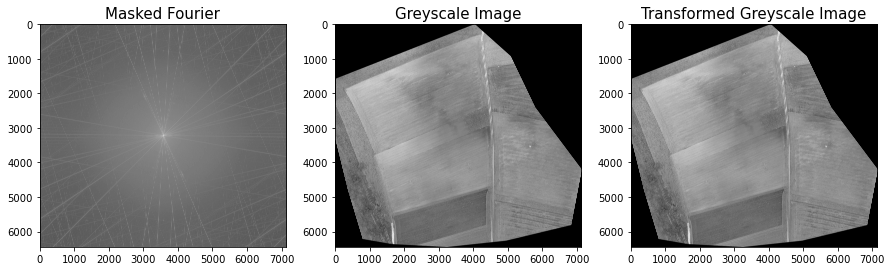

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

dark_image = imread('D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_rgb.tif')
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')


dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')


def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size)
    
fourier_masker_ver(dark_image, 1)


def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size)
fourier_masker_hor(dark_image, 1)


def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image, i)
 
fourier_iterator(dark_image, [0.001, 1, 100])


def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


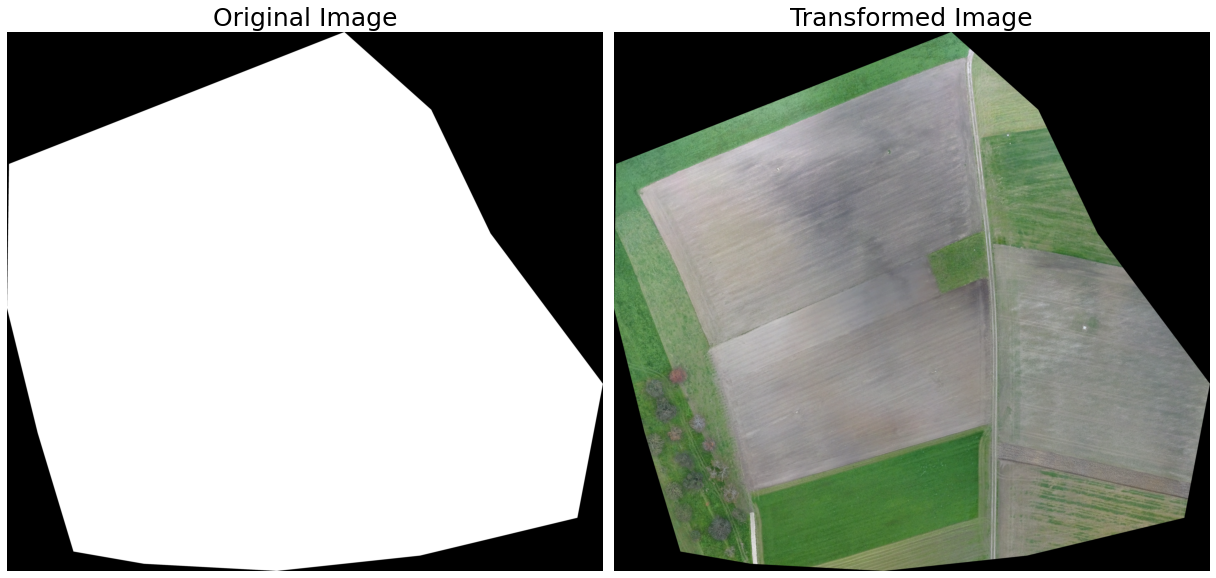

In [11]:
fourier_transform_rgb(dark_image)

In [32]:
%matplotlib inline
import utils
import cannyEdgeDetection as ced

detector = ced.cannyEdgeDetector(dark_image_grey, sigma=1, kernel_size=1, lowthreshold=1, highthreshold=1, weak_pixel=1)

imgs_final = detector.detect()
utils.visualize(imgs_final, 'gray')

RuntimeError: filter weights array has incorrect shape.

In [40]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Original


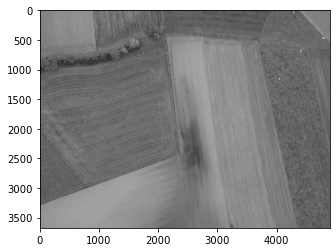

Gussian


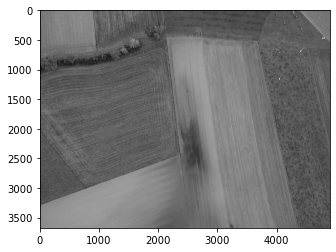

KeyboardInterrupt: 

In [54]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 14 19:29:49 2020

@author: Namra Rehman
"""

import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def checkWeak(edge,weakEdges,weakIndex):
    for i in range(0,1):
        for j in range(0,weakIndex):
            if(weakEdges[i,j]==edge):
                return 1
            else:
                return 0
    
def canny():
    dark_image = imread('D:/Sursee_2020/2020-10-22_adi_Wetzwil-RGB/img/DSC01552.JPG')
    dark_image_grey = rgb2gray(dark_image)
    img = dark_image_grey
    #img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)    #convert image to gray if you have color image.
    
    print("Original")
    plt.imshow(img,cmap="gray")
    plt.show()
    
    #step1  ================================================================
    gussianImage = cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
    print("Gussian")
    plt.imshow(gussianImage,cmap="gray")
    plt.show()

    #step2  ================================================================
    sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = float)
    sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = float)
    
    row,col =img.shape
    #row = img.shape[0] #row 
    #col = img.shape[1] #column

    sobelxImage = np.zeros([row,col])
    sobelyImage  = np.zeros([row,col])
    sobelMagImage  = np.zeros([row,col])
    thetaImage  = np.zeros([row,col])
    
    #padding 0's 
    gussianImage1 = np.pad(gussianImage, (1,1), 'edge')
    
    for i in range(1, row-1):
        for j in range(1, col-1):   
            gx = (sobelx[0][0] * gussianImage1[i-1][j-1]) + (sobelx[0][1] * gussianImage1[i-1][j]) +\
                 (sobelx[0][2] * gussianImage1[i-1][j+1]) + (sobelx[1][0] * gussianImage1[i][j-1]) + \
                 (sobelx[1][1] * gussianImage1[i][j]) + (sobelx[1][2] * gussianImage1[i][j+1]) + \
                 (sobelx[2][0] * gussianImage1[i+1][j-1]) + (sobelx[2][1] * gussianImage1[i+1][j]) +\
                 (sobelx[2][2] * gussianImage1[i+1][j+1])  
                 
            gy = (sobely[0][0] * gussianImage1[i-1][j-1]) + (sobely[0][1] * gussianImage1[i-1][j]) + \
                 (sobely[0][2] * gussianImage1[i-1][j+1]) + (sobely[1][0] * gussianImage1[i][j-1]) + \
                 (sobely[1][1] * gussianImage1[i][j]) + (sobely[1][2] * gussianImage1[i][j+1]) + \
                 (sobely[2][0] * gussianImage1[i+1][j-1]) + (sobely[2][1] * gussianImage1[i+1][j]) + \
                 (sobely[2][2] * gussianImage1[i+1][j+1]) 
                 
            sobelxImage[i-1][j-1] = gx
            sobelyImage[i-1][j-1] = gy
            
            #Calculate the gradient magnitude
            g = np.sqrt(gx * gx + gy * gy)
            sobelMagImage[i-1][j-1] = g
            
            thetaImage[i-1][j-1] = np.arctan2(gy, gx)
    
    print("Horizontal Sobel")
    plt.imshow(sobelxImage,cmap="gray")
    plt.show()
    print("Vertical sobel")
    plt.imshow(sobelyImage,cmap="gray")
    plt.show()
    print("Sobel magnitude")
    plt.imshow(sobelMagImage,cmap="gray")
    plt.show() 
    
    #step3  ================================================================
    nonMaximaImage  = np.zeros([row,col])
    for i in range(0,row-1):
        for j in range(0,col-1):  
            if (thetaImage[i,j]>=-22.5 and thetaImage[i,j]<=22.5) or (thetaImage[i,j]<-157.5 and thetaImage[i,j]>=-202):
                if (sobelMagImage[i,j] >= sobelMagImage[i,j+1]) and (sobelMagImage[i,j] >= sobelMagImage[i,j-1]):
                    nonMaximaImage[i,j]= sobelMagImage[i,j]
                else:
                    nonMaximaImage[i,j]=0
                
            elif (thetaImage[i,j]>=22.5 and thetaImage[i,j]<=67.5) or (thetaImage[i,j]<-112.5 and thetaImage[i,j]>=-157.5):
                if (sobelMagImage[i,j] >= sobelMagImage[i+1,j+1]) and (sobelMagImage[i,j] >= sobelMagImage[i-1,j-1]):
                    nonMaximaImage[i,j]= sobelMagImage[i,j]
                else:
                    nonMaximaImage[i,j]=0
               
            elif (thetaImage[i,j]>=67.5 and thetaImage[i,j]<=112.5) or(thetaImage[i,j]<-67.5 and thetaImage[i,j]>=-112.5):
                if (sobelMagImage[i,j] >= sobelMagImage[i+1,j]) and (sobelMagImage[i,j] >= sobelMagImage[i-1,j]):
                    nonMaximaImage[i,j]= sobelMagImage[i,j]
                else:
                    nonMaximaImage[i,j]=0
                
            elif (thetaImage[i,j]>=112.5 and thetaImage[i,j]<=157.5) or (thetaImage[i,j]<-22.5 and thetaImage[i,j]>=-67.5):
                if (sobelMagImage[i,j] >= sobelMagImage[i+1,j-1]) and (sobelMagImage[i,j] >= sobelMagImage[i-1,j+1]):
                    nonMaximaImage[i,j]= sobelMagImage[i,j]
                else:
                    nonMaximaImage[i,j]=0
             
    print("After non maxima suppression")
    plt.imshow(nonMaximaImage,cmap="gray")
    plt.show()
    
    #step4  ================================================================
    highThreshold = nonMaximaImage.max()*0.09;
    lowThreshold = highThreshold*0.05;
    
    strongEdgesRow = np.zeros([1,row*col])
    strongEdgesCol = np.zeros([1,row*col])
    weakEdgesRow = np.zeros([1,row*col])
    weakEdgesCol = np.zeros([1,row*col])
    strongIndex = 0
    weakIndex = 0
    
    weakEdges = np.zeros([1,row*col])
    for x in range(0,row):
        for y in range(0,col):
            #print("x",x)           #debugging
            #print("y",y)
            #print("strong",strongIndex)
            #print("weak",weakIndex)
            
            if (nonMaximaImage[x,y] > highThreshold):
                nonMaximaImage[x,y] = 1
                strongEdgesRow[0,strongIndex] = x
                strongEdgesCol[0,strongIndex] = y
                strongIndex = strongIndex + 1
                
            elif (nonMaximaImage[x,y] < lowThreshold):
                nonMaximaImage[x,y] = 0
            else:                        
                weakEdgesRow[0,weakIndex] = x
                weakEdgesCol[0,weakIndex] = y
                weakEdges[0,weakIndex]=nonMaximaImage[x,y]
                weakIndex = weakIndex + 1
    
    print("After double thresholding")
    plt.imshow(nonMaximaImage,cmap="gray")
    plt.show()    
    #step5  ================================================================
    hysteresisImage  = np.zeros([row,col])
    hysteresisImage=nonMaximaImage
    for i in range(row):
        for j in range(col):
            #check if current edge is weak 
            if (checkWeak(nonMaximaImage[i,j],weakEdges,weakIndex)==1):
                
                #if weak , then check if it has any strong around
                if ((nonMaximaImage[i+1, j-1] == 1) or (nonMaximaImage[i+1, j] == 1) or (nonMaximaImage[i+1, j+1] == 1) 
                or (nonMaximaImage[i, j-1] == 1) or (nonMaximaImage[i, j+1] == 1)
                or (nonMaximaImage[i-1, j-1] == 1) or (nonMaximaImage[i-1, j] == 1) 
                or (nonMaximaImage[i-1, j+1] == 1)):
                    
                    hysteresisImage[i, j] = 1
                else:
                    hysteresisImage[i, j] = 0
    
    print("After hysteresis thresholding")
    plt.imshow(hysteresisImage,cmap="gray")
    plt.show()
    
    
    #debugging purpose
    #hysteresisImage=hysteresisImage-nonMaximaImage
    #plt.imshow(hysteresisImage)
    #plt.show()
    
   
 
#driver 
canny()

In [14]:
import cv2

# Read the original image
#img = dark_image_grey
# Display original image
#cv2.imshow('Original', img)
#cv2.waitKey(0)
img = cv2.imread('D:/Sursee_2020/2020-10-22_adi_Wetzwil-RGB/img/DSC01552.JPG')

# Convert to graycsale
img_gray = img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
cv2.imshow('Blur', img_gray)
cv2.waitKey(0)

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

imS = cv2.resize(img_blur, (960, 540)) 
cv2.imshow('Blur', imS)
cv2.waitKey(0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
#cv2.imshow('Sobel X', sobelx)
#cv2.waitKey(0)
#cv2.imshow('Sobel Y', sobely)
#cv2.waitKey(0)
#cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
#cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=20, threshold2=50) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.namedWindow("Canny Edge Detection", cv2.WINDOW_NORMAL) 
imS = cv2.resize(edges, (960, 540))                # Resize image
cv2.imshow('Canny Edge Detection', imS)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np

img = cv2.imread('D:/Sursee_2020/2020-10-22_adi_Wetzwil-RGB/img/DSC01552.JPG', cv2.IMREAD_UNCHANGED)

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
cv2.imwrite('D:/contours.png',img_contours) 

True

In [9]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte

orig_phantom =  cv2.imread('D:/Sursee_2020/2020-10-22_adi_Wetzwil-RGB/img/DSC01552.JPG')

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

In [12]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image 
from skimage.morphology import disk  

footprint = disk(3)
eroded = erosion(orig_phantom, footprint)
plot_comparison(orig_phantom, eroded, 'erosion')

RuntimeError: footprint array has incorrect shape.